In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa 
import librosa.display

/home/rbaijal/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [71]:
def readAudio(filename):
    x, sr = librosa.load(filename, sr=16000)
    return x, sr

#calculate spectrogram
def calc_spec(x):
    n_fft = 1024
    hop_length = 512
    win_length = 1024
    X = np.abs(librosa.stft(x, n_fft = n_fft, hop_length = hop_length, win_length = win_length, window='hann', dtype = np.complex256))
    X = librosa.power_to_db(X,ref=np.max)
    return X

def saveSpectrogram(X, outfilename):
    assert outfilename[-4:]=='.npy'  #'outfilename extension should be .npy'
    np.save(outfilename, X)
    return

def readSpectrogram(infilename):
    X = np.load(infilename)
    return X

In [3]:
x, sr = readAudio('wav/music+speech_noisy7.wav')

In [4]:
import IPython.display as ipd
ipd.Audio(x, rate=16000)

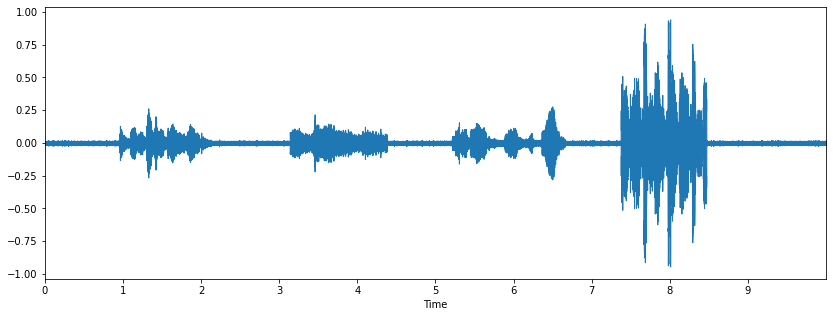

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=16000)

In [8]:
print(x.shape)
x = x[:160000]
x.shape

(160000,)


(160000,)

In [72]:
X = calc_spec(x)

In [73]:
mels = librosa.feature.melspectrogram(S=X, sr=16000, n_mels=64)
log_mels = librosa.core.amplitude_to_db(mels, ref=np.max)
mfcc = librosa.feature.mfcc(S=log_mels, sr=16000, n_mfcc=20)

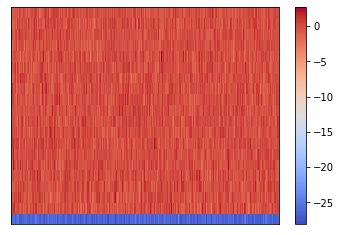

In [74]:
plt.figure()
librosa.display.specshow(mfcc)
plt.colorbar()

In [75]:
mfcc.shape

(20, 313)

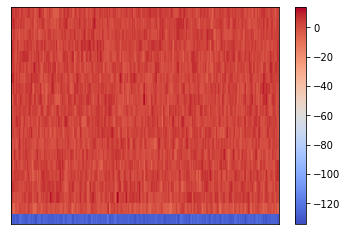

In [76]:
mfccs = librosa.feature.mfcc(y=x, sr=16000, n_mfcc=20, hop_length=512)
plt.figure()
librosa.display.specshow(mfccs)
plt.colorbar()

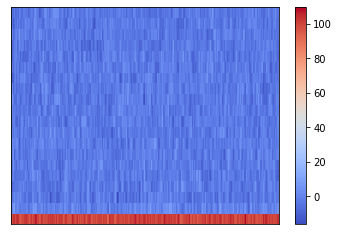

In [78]:
M = mfcc-mfccs
plt.figure()
librosa.display.specshow(M)
plt.colorbar()


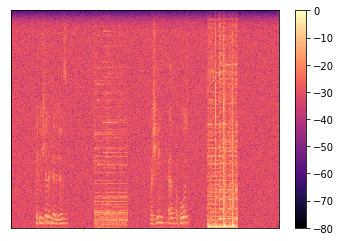

In [11]:
plt.figure()
librosa.display.specshow(X)
plt.colorbar()

In [41]:
xr = np.random.uniform(low=0.0, high=0.001, size=(160000,))
# xr = np.zeros(160000)
# x = x/10
ipd.Audio(x-xr, rate=16000)

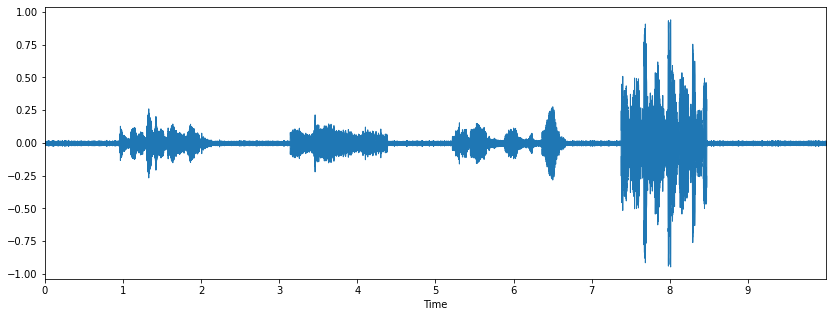

In [42]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x-xr, sr=16000)

In [33]:
X = calc_spec(x-xr)

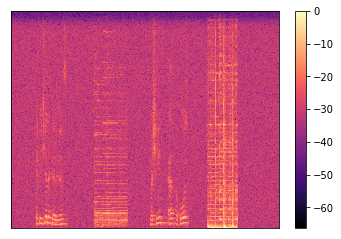

In [34]:
plt.figure()
librosa.display.specshow(X)
plt.colorbar()

In [44]:
import scipy
import soundfile as sf

In [31]:
from scipy.io.wavfile import write

In [45]:
sf.write("example1.wav", xr,  16000)

In [17]:
samplerate = 16000
fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)

In [50]:
data

array([ 0.00000000e+00,  5.02141696e+02,  1.00416546e+03, ...,
       -1.00416546e+03, -5.02141696e+02,  1.28734120e-10])

In [38]:
data,sr = readAudio('example.wav')

In [40]:
xr = np.random.uniform(low=0.0, high=0.0001, size=(160000,))
# x = x/10
ipd.Audio(data, rate=16000)

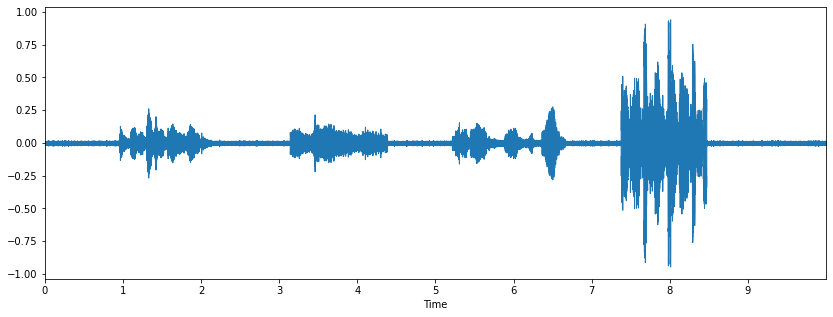

In [39]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=16000)

In [49]:
levels = [ 0.0005, 0.001, 0.005, 0.01, 0.1]
j = 0
for i in range(200):
    print(levels[j])
    if (i+1) % 50 == 0:
        j+=1
    x = np.random.uniform(low=0.0, high=levels[j], size=(160000,)) # generate noise of 10s
    sf.write("silence_wavs/noise" + str(i) + ".wav", x , 16000)
    

0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
